# Libraries

In [1]:
import pandas as pd

In [3]:
import seaborn as sns

In [5]:
from sklearn.utils import resample

In [7]:
import matplotlib.pyplot as plt

In [9]:
from imblearn.over_sampling import SMOTE

In [11]:
import numpy as np

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [95]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data

In [19]:
df = pd.read_csv("train.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Technique - 1: Handle Missing data

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df.shape

(891, 12)

### TYPE- 1: Remove missing values

In [15]:
df.dropna().shape

(183, 12)

In [19]:
df.dropna(axis=1).shape

(891, 9)

### TYPE - 2: Mean Imputation for Normally distributed data

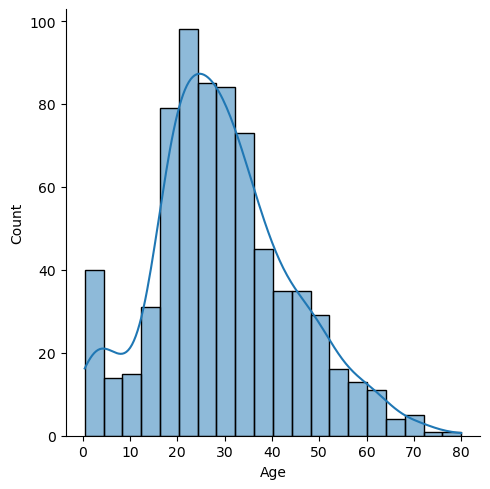

In [29]:
sns.displot(df['Age'], kde=True)

In [37]:
df['Age'].mean().round(0)

30.0

In [67]:
df['Age'].fillna(30, inplace=True)

C:\Users\keert\AppData\Local\Temp\ipykernel_5412\54058438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(30, inplace=True)


In [69]:
df['Age'].isna().sum()

0

### TYPE - 2: Median Imputation for dataset with outliers

In [47]:
df['Age'].median()

30.0

### TYPE - 3: Mode Imputation for Categorical values

In [49]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [71]:
df['Embarked'].fillna('S', inplace=True)

C:\Users\keert\AppData\Local\Temp\ipykernel_5412\448288291.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [55]:
df['Embarked'].isna().sum()

0

### TYPE - 4: Random Sampling Imputation

In [57]:
df['Age'][0]

22.0

In [59]:
df['Age'].fillna(df['Age'][0])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### TYPE - 5: Arbitrary Imputation

In [61]:
df['Age'].fillna(100)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

# 2. Handle Imbalanced dataset

In [68]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### class 0 -- 61% & class 1 -- 38%

### Upsampling

In [74]:
df_minority = df[df['Survived'] == 1]
df_majority = df[df['Survived'] == 0]

In [78]:
upsampled_df = resample(df_minority, n_samples=len(df_majority), replace=True, random_state=42)

In [80]:
upsampled_df.shape

(549, 12)

In [86]:
actual_df = pd.concat((df_majority, upsampled_df))

In [88]:
actual_df['Survived'].value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

## Downsampling

In [90]:
downsampled_df = resample(df_majority, n_samples=len(df_minority), replace=False, random_state=42)

In [92]:
downsampled_df.shape

(342, 12)

In [94]:
actual_df = pd.concat((df_minority, downsampled_df))

In [96]:
actual_df['Survived'].value_counts()

Survived
1    342
0    342
Name: count, dtype: int64

## Synthetic Minority Oversampling technique (SMOTE)

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


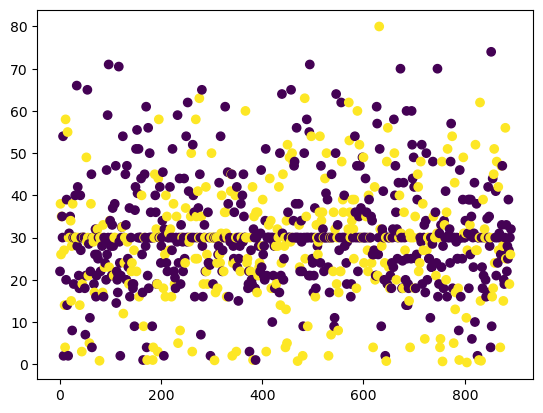

In [120]:
plt.scatter(df['PassengerId'], df['Age'], c= df['Survived'])

In [122]:
df.shape

(891, 12)

In [126]:
smote = SMOTE()

In [136]:
X,y = smote.fit_resample(df[['PassengerId', 'Age']], y = df['Survived'])

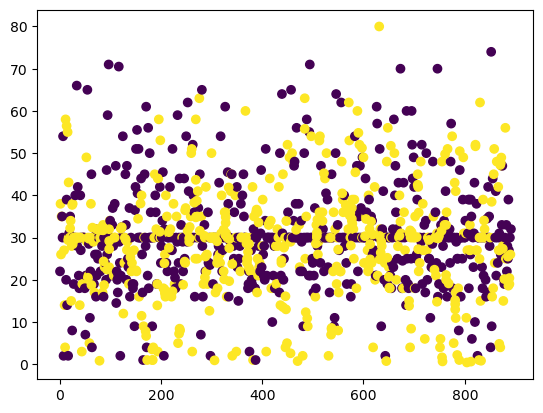

In [138]:
plt.scatter(X['PassengerId'], X['Age'], c= y)

# 3. Handle Outliers

### 5 number summary

In [146]:
Q1 = np.quantile(df['Age'], .25)
Q2 = np.quantile(df['Age'], .50)
Q3 = np.quantile(df['Age'], .75)

In [148]:
IQR = Q3 - Q1

In [150]:
IQR

13.0

In [152]:
lowerfence = Q1 - (1.5 * IQR)
upperfence = Q3 + (1.5 * IQR)

In [154]:
lowerfence, upperfence

(2.5, 54.5)

In [158]:
outliers = []
for i in df['Age']:
    if i < lowerfence or i > upperfence:
        outliers.append(i)

In [162]:
len(outliers)

66

<Axes: ylabel='Age'>

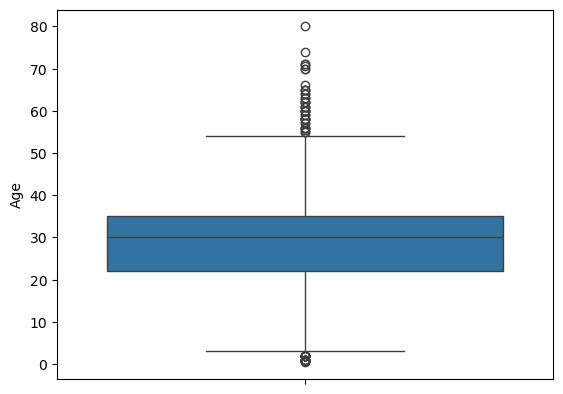

In [164]:
sns.boxplot(df['Age'])

# 4. Data Encoding

In [170]:
columns = ['Pclass', 'Sex', 'Embarked']

for column in columns:
    print(column)
    print(df[column].unique())

Pclass
[3 1 2]
Sex
['male' 'female']
Embarked
['S' 'C' 'Q']


### Nominal or One Hot Encoding

In [198]:
onehotencoder = OneHotEncoder()

In [204]:
sex_encoded = onehotencoder.fit_transform(df[['Sex']]).toarray()

In [206]:
sex_encoded

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [216]:
sex_encoded_df = pd.DataFrame(sex_encoded, columns=onehotencoder.get_feature_names_out())

In [218]:
sex_encoded_df

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [210]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Label Encoding

In [41]:
labelencoder = LabelEncoder()

In [43]:
sex_encoded = labelencoder.fit_transform(df[['Embarked']])

C:\Users\keert\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
embarked_encoded_df = pd.DataFrame(sex_encoded, columns=['embarked__label_encoded'])

In [47]:
embarked_encoded_df

,embarked__label_encoded
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


### Ordinal Encoding

In [23]:
ordinalencoder = OrdinalEncoder(categories = [['male', 'female']])

In [29]:
sex_encoded = ordinalencoder.fit_transform(df[['Sex']])

In [31]:
x_encoded_df = pd.DataFrame(sex_encoded, columns=['sex__ordinal_encoded'])

In [35]:
pd.concat([df, x_encoded_df], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex__ordinal_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0


In [99]:
new_df = pd.concat([df, x_encoded_df, embarked_encoded_df], axis=1)

In [105]:
new_df = new_df.drop(['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1)

# 5. Feature Scaling

In [109]:
scaler = StandardScaler()

In [ ]:
scaler